<a href="https://colab.research.google.com/github/Crisitunity-Lab/ARDC-Project/blob/main/Llama_prototyp_r3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Llama Prototype

SUMA 10/09/2023

#Instructions

Create Folder for the experiment on personal Google Drive
1.   Get model from: https://huggingface.co/eachadea/legacy-ggml-vicuna-13b-4bit/tree/main
2.   Create project folder
3.   Create Folder 'model' in project folder  
4.   Save model in folder 'model'
5.   Create folder 'data' in project folder
6.   Save folder CrisiLexT26 in folder 'data'
7.   Data sourced from: https://crisislex.org/data-collections.html#CrisisLexT26
3.   Mount Google Drive
4.   Update code with Paths
5.   Pip install llama-cpp-python package
version 0.1.4.9
6.   Documentation for llama-ccp: https://llama-cpp-python.readthedocs.io/en/latest/api-reference/
6.   Load packages llama_ccp and json
7.   Run Code





In [2]:
# Inastalling llama
!pip install llama-cpp-python==0.1.49

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 4.0 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for llama-cpp-python: filename=llama_cpp_python-0.1.49-cp310-cp310-linux_x86_64.whl size=181338 sha256=22d884a94af75be5ccffdd9d511c69e2aaa53c2f64bfa82e4dbb5d21f19414e7
  Stored in directory: /root/.cache/pip/wheels/01/f3/f7/b070cbde244babc2ead31326c399bd2d4187ffffed9ea09ce9
Successfully built llama-cpp-python


In [1]:
# Import Packages
from llama_cpp import Llama
import pandas as pd
import numpy as np
import json
import os
import csv
import time
import re
import matplotlib.pyplot as plt



In [2]:
# Mounting GDrive
from google.colab import drive
drive.mount('/content/gdrive')


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
# Read (timestamps)

# Path to the main folder
main_folder = '/content/gdrive/MyDrive/iLab2/data/CrisisLexT26'

# Function to process CSV files in a folder
def process_folder(folder_path):
    dfs = []
    for root, _, files in os.walk(folder_path):
        for file in files:
            if file.endswith('.csv') and 'period' in file.lower():
                file_path = os.path.join(root, file)
                df = pd.read_csv(file_path)
                dfs.append(df)
    return dfs

# Read and process each subfolder
combined_data = []
for subfolder in os.listdir(main_folder):
    subfolder_path = os.path.join(main_folder, subfolder)
    if os.path.isdir(subfolder_path):
        subfolder_data = process_folder(subfolder_path)
        combined_data.extend(subfolder_data)

# Concatenate all data into one DataFrame
combined_df_p = pd.concat(combined_data, ignore_index=True)


# Remove spaces from column names
combined_df_p.columns = combined_df_p.columns.str.replace(' ', '')

# Rename Columns in prep for left join
combined_df_p.rename(columns={'Tweet-ID': 'Tweet ID'}, inplace=True)

# # Save the combined DataFrame to a CSV file
# output_file = 'combined_data.csv'
# combined_df.to_csv(output_file, index=False)

print(f"Combined timestamps read")


Combined timestamps read


In [4]:
# Read and anontate (tweets)

# Path to the main folder
main_folder = '/content/gdrive/MyDrive/iLab2/data/CrisisLexT26'

# Function to process CSV files in a folder and add folder name as label
def process_folder(folder_path, label):
    dfs = []
    for root, _, files in os.walk(folder_path):
        for file in files:
            if file.endswith('.csv') and 'labeled' in file.lower():
                file_path = os.path.join(root, file)
                df = pd.read_csv(file_path)
                df['Label'] = label
                dfs.append(df)
    return dfs

# Read and process each subfolder
combined_data = []
for subfolder in os.listdir(main_folder):
    subfolder_path = os.path.join(main_folder, subfolder)
    if os.path.isdir(subfolder_path):
        label = subfolder
        subfolder_data = process_folder(subfolder_path, label)
        combined_data.extend(subfolder_data)

# Concatenate all data into one DataFrame
combined_df_l = pd.concat(combined_data, ignore_index=True)

# # Save the combined DataFrame to a CSV file
# output_file = 'combined_data.csv'
# combined_df.to_csv(output_file, index=False)

print(f"Combined tweets read")
# working_df.head(10)


Combined tweets read


In [5]:
# Check
combined_df_p.columns

combined_df_p.head()

,Timestamp,Tweet ID,Included(Y/N)
0,Thu Jun 20 03:56:19 +0000 2013,347563538547609602,Y
1,Mon Jul 01 16:10:43 +0000 2013,351734622884855808,Y
2,Mon Jul 01 16:19:46 +0000 2013,351736900391931904,Y
3,Mon Jul 01 16:28:15 +0000 2013,351739035271700482,Y
4,Mon Jul 01 16:38:38 +0000 2013,351741648327294977,Y


In [6]:
# Extract earliest timestamp

# Assuming 'Timestamp' is in datetime format, if not, convert it to datetime first
combined_df_p['Timestamp'] = pd.to_datetime(combined_df_p['Timestamp'])

# Group by 'Tweet-ID' and aggregate to find the earliest timestamp
earliest_timestamps = combined_df_p.groupby('Tweet ID')['Timestamp'].agg('min').reset_index()

# Display or use the resulting DataFrame 'earliest_timestamps'
# print(earliest_timestamps)

In [7]:
# Left join

# Perform a left join on 'Tweet ID'
result_df = combined_df_l.merge(earliest_timestamps, on='Tweet ID', how='left')

# Display or use the resulting DataFrame 'result_df'
# print(result_df)
result_df.shape
result_df.head()

,Tweet ID,Tweet Text,Information Source,Information Type,Informativeness,Label,Timestamp
0,347686624563429378,"RT @CBCAlerts: Canmore, Alta. declares state o...",Media,Affected individuals,Related and informative,2013_Alberta_floods,2013-06-20 12:05:25+00:00
1,347766337344503808,RT @GlobalCalgary: If you are in #Canmore and ...,Media,Caution and advice,Related and informative,2013_Alberta_floods,2013-06-20 17:22:10+00:00
2,347779159327637504,RT @metrocalgary: UPDATE: Latest from the @cit...,Government,Caution and advice,Related and informative,2013_Alberta_floods,2013-06-20 18:13:07+00:00
3,347783236191129600,RT @GlobalCalgary: GALLERY: Incredible photos ...,Media,Not applicable,Related and informative,2013_Alberta_floods,2013-06-20 18:29:19+00:00
4,347793432514801665,RT @nenshi: Major risk of flooding in Calgary....,Government,Caution and advice,Related and informative,2013_Alberta_floods,2013-06-20 19:09:50+00:00


In [8]:
# Load Model
print("Load Model ...")
llm = Llama(model_path = '/content/gdrive/MyDrive/iLab2/model_llm/ggml-vicuna-13b-4bit-rev1.bin', verbose=True )
print("Load Model")


Load Model ...
Load Model


AVX = 1 | AVX2 = 1 | AVX512 = 0 | AVX512_VBMI = 0 | AVX512_VNNI = 0 | FMA = 1 | NEON = 0 | ARM_FMA = 0 | F16C = 1 | FP16_VA = 0 | WASM_SIMD = 0 | BLAS = 0 | SSE3 = 1 | VSX = 0 | 


In [9]:
# Grab 10 random samples
filtered_df = result_df.query("Label == '2013_Colorado_floods'")
testing_df = filtered_df.sample(n=20, random_state=42)
testing_df.columns = testing_df.columns.str.replace(' ', '')

testing_df.head(12)


,TweetID,TweetText,InformationSource,InformationType,Informativeness,Label,Timestamp
10507,379918454104408064,MT @COEmergency Colorado 2-1-1 Recovery and Re...,Government,Donations and volunteering,Related and informative,2013_Colorado_floods,2013-09-17 10:43:12+00:00
10723,380796468728045568,"$CLF Factbox: Floods shut oil, gas operations ...",Media,Infrastructure and utilities,Related and informative,2013_Colorado_floods,2013-09-19 20:52:07+00:00
10726,380808204420014080,Wow- plowing out the mud from the bike path I ...,Eyewitness,Infrastructure and utilities,Related - but not informative,2013_Colorado_floods,2013-09-19 21:38:45+00:00
10646,380450807746797568,Proud to be playing this all star event in #Lo...,Outsiders,Donations and volunteering,Related - but not informative,2013_Colorado_floods,2013-09-18 21:58:35+00:00
10397,379623338672287744,RT @OWHnews: Colorado flooding: Have your frie...,Media,Affected individuals,Related - but not informative,2013_Colorado_floods,2013-09-16 15:10:31+00:00
10664,380490196464041984,#Jamestown resident says things are disappeari...,Outsiders,Affected individuals,Related and informative,2013_Colorado_floods,2013-09-19 00:35:06+00:00
10612,380337729331933184,RT @EnviroAction: Colorado #fracking site feat...,NGOs,Infrastructure and utilities,Related and informative,2013_Colorado_floods,2013-09-18 14:29:15+00:00
10499,379836589691506688,Praying for Colorado because its crazy floodin...,Outsiders,Sympathy and support,Related - but not informative,2013_Colorado_floods,2013-09-17 05:17:54+00:00
10845,381803449840435200,RT @denverpost: Colorado's September floods wi...,Media,Infrastructure and utilities,Related and informative,2013_Colorado_floods,2013-09-22 15:33:30+00:00
10122,378191675941588992,"RT @sciam: Two Dead, Hundreds Evacuated, Cars ...",Media,Affected individuals,Related and informative,2013_Colorado_floods,2013-09-12 16:21:36+00:00


In [10]:
# Running model

# Looping over data
for index, row in testing_df.iterrows():
    start_time = time.time()

    # Construct the question
    question_construct = "Please the sentiment score only as number between 0 and 1 for the following snippet: " + row['TweetText'] + "? Answer:"

    # Run the model to analyze sentiment
    output = llm(question_construct, max_tokens = 250, stop = ["\n", "Question:", "Q:"], echo = True)

    # Extract the sentiment score using regular expressions
    answer_text = output.get("choices")[0].get("text")
    sentiment_score_match = re.search(r'Answer:(.+)', answer_text)

    if sentiment_score_match:
        sentiment_score = sentiment_score_match.group(1).strip()
    else:
        sentiment_score = None

    end_time = time.time()

    # Update the 'sentiment_score' column in the DataFrame
    testing_df.at[index, 'sentiment_score'] = sentiment_score
    testing_df.at[index, 'runtime'] = end_time - start_time

# Now, 'testing_df' contains the sentiment scores extracted from the JSON responses



Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit
Llama.generate: prefix-match hit


In [11]:
# Print output
testing_df.head(10)


,TweetID,TweetText,InformationSource,InformationType,Informativeness,Label,Timestamp,sentiment_score,runtime
10507,379918454104408064,MT @COEmergency Colorado 2-1-1 Recovery and Re...,Government,Donations and volunteering,Related and informative,2013_Colorado_floods,2013-09-17 10:43:12+00:00,0.8,89.281467
10723,380796468728045568,"$CLF Factbox: Floods shut oil, gas operations ...",Media,Infrastructure and utilities,Related and informative,2013_Colorado_floods,2013-09-19 20:52:07+00:00,0.0,45.637422
10726,380808204420014080,Wow- plowing out the mud from the bike path I ...,Eyewitness,Infrastructure and utilities,Related - but not informative,2013_Colorado_floods,2013-09-19 21:38:45+00:00,0.9,68.469981
10646,380450807746797568,Proud to be playing this all star event in #Lo...,Outsiders,Donations and volunteering,Related - but not informative,2013_Colorado_floods,2013-09-18 21:58:35+00:00,Slightly Positive,69.874982
10397,379623338672287744,RT @OWHnews: Colorado flooding: Have your frie...,Media,Affected individuals,Related - but not informative,2013_Colorado_floods,2013-09-16 15:10:31+00:00,0.93,72.243323
10664,380490196464041984,#Jamestown resident says things are disappeari...,Outsiders,Affected individuals,Related and informative,2013_Colorado_floods,2013-09-19 00:35:06+00:00,0.7,56.214570
10612,380337729331933184,RT @EnviroAction: Colorado #fracking site feat...,NGOs,Infrastructure and utilities,Related and informative,2013_Colorado_floods,2013-09-18 14:29:15+00:00,0.0000000,75.714366
10499,379836589691506688,Praying for Colorado because its crazy floodin...,Outsiders,Sympathy and support,Related - but not informative,2013_Colorado_floods,2013-09-17 05:17:54+00:00,0.12,40.213219
10845,381803449840435200,RT @denverpost: Colorado's September floods wi...,Media,Infrastructure and utilities,Related and informative,2013_Colorado_floods,2013-09-22 15:33:30+00:00,0.5,66.221565
10122,378191675941588992,"RT @sciam: Two Dead, Hundreds Evacuated, Cars ...",Media,Affected individuals,Related and informative,2013_Colorado_floods,2013-09-12 16:21:36+00:00,0.6,54.207082


In [13]:
# Remove all non-numeric characters and convert to float64
testing_df['sentiment_score'] = testing_df['sentiment_score'].apply(lambda x: ''.join(filter(lambda c: c.isdigit() or c == '.', str(x))))
testing_df['sentiment_score'] = testing_df['sentiment_score'].apply(pd.to_numeric, errors='coerce', downcast='float')
testing_df.head(10)

,TweetID,TweetText,InformationSource,InformationType,Informativeness,Label,Timestamp,sentiment_score,runtime
10507,379918454104408064,MT @COEmergency Colorado 2-1-1 Recovery and Re...,Government,Donations and volunteering,Related and informative,2013_Colorado_floods,2013-09-17 10:43:12+00:00,0.80,89.281467
10723,380796468728045568,"$CLF Factbox: Floods shut oil, gas operations ...",Media,Infrastructure and utilities,Related and informative,2013_Colorado_floods,2013-09-19 20:52:07+00:00,0.00,45.637422
10726,380808204420014080,Wow- plowing out the mud from the bike path I ...,Eyewitness,Infrastructure and utilities,Related - but not informative,2013_Colorado_floods,2013-09-19 21:38:45+00:00,0.90,68.469981
10646,380450807746797568,Proud to be playing this all star event in #Lo...,Outsiders,Donations and volunteering,Related - but not informative,2013_Colorado_floods,2013-09-18 21:58:35+00:00,NaN,69.874982
10397,379623338672287744,RT @OWHnews: Colorado flooding: Have your frie...,Media,Affected individuals,Related - but not informative,2013_Colorado_floods,2013-09-16 15:10:31+00:00,0.93,72.243323
10664,380490196464041984,#Jamestown resident says things are disappeari...,Outsiders,Affected individuals,Related and informative,2013_Colorado_floods,2013-09-19 00:35:06+00:00,0.70,56.214570
10612,380337729331933184,RT @EnviroAction: Colorado #fracking site feat...,NGOs,Infrastructure and utilities,Related and informative,2013_Colorado_floods,2013-09-18 14:29:15+00:00,0.00,75.714366
10499,379836589691506688,Praying for Colorado because its crazy floodin...,Outsiders,Sympathy and support,Related - but not informative,2013_Colorado_floods,2013-09-17 05:17:54+00:00,0.12,40.213219
10845,381803449840435200,RT @denverpost: Colorado's September floods wi...,Media,Infrastructure and utilities,Related and informative,2013_Colorado_floods,2013-09-22 15:33:30+00:00,0.50,66.221565
10122,378191675941588992,"RT @sciam: Two Dead, Hundreds Evacuated, Cars ...",Media,Affected individuals,Related and informative,2013_Colorado_floods,2013-09-12 16:21:36+00:00,0.60,54.207082


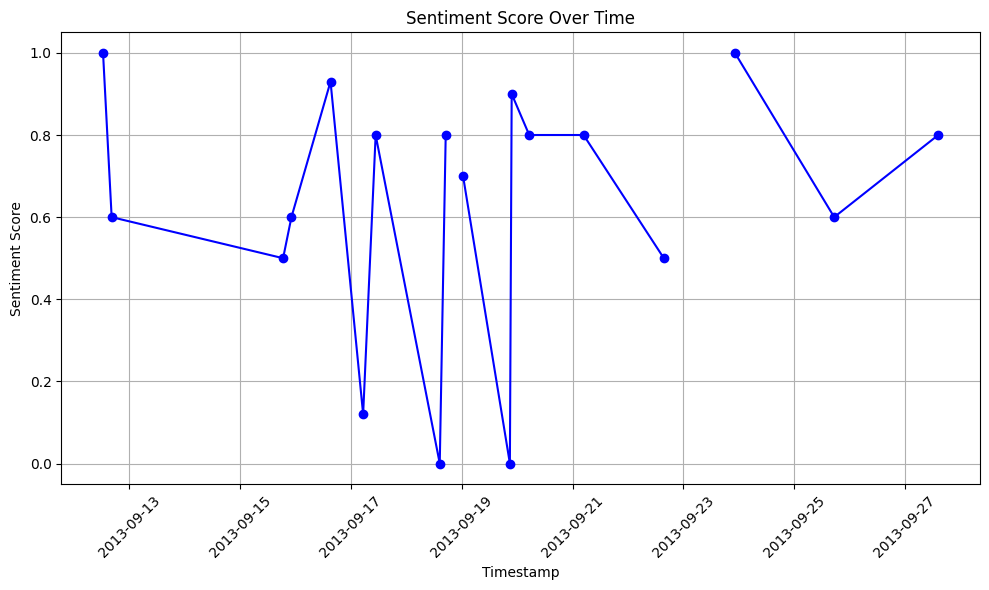

In [15]:
# Plot 'Timestamp' and 'sentiment_score'

# Order
testing_df = testing_df.sort_values(by='Timestamp', ascending=True)
testing_df.reset_index(drop=True, inplace=True)

# Create a line plot
plt.figure(figsize=(10, 6))
plt.plot(testing_df['Timestamp'], testing_df['sentiment_score'], marker='o', linestyle='-', color='b')

# Set plot labels and title
plt.xlabel('Timestamp')
plt.ylabel('Sentiment Score')
plt.title('Sentiment Score Over Time')

# Rotate x-axis labels for better readability (optional)
plt.xticks(rotation=45)

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()
